In [3]:
print(1)

1


In [8]:
%pip install numpy==1.26.4

%pip install pandas

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
basemap 2.0.0 requires numpy<2.4,>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("G:\My Drive\projects\data_science\working\dataset\IndianNamesUnique.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\gayat\AppData\Local\Temp\ipykernel_30108\2991863227.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("G:\My Drive\projects\data_science\working\dataset\IndianNamesUnique.csv")


,Name
0,AABAN
1,AABARANA
2,AABARNA
3,AABARNIGA
4,AABARSHANA


In [3]:
df.shape

(60600, 1)

In [17]:
import random


def get_unique_number(pool):
    num = random.choice(pool)
    pool.remove(num)
    return df.iloc[num]["Name"]

available_numbers = list(range(0, df.shape[0]))


Mean: 332.95914191419143
Median: 339.0
Min: 37 Max: 498


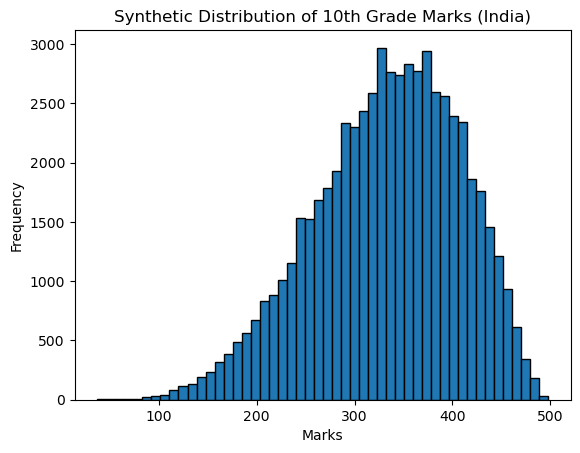

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 60600
max_marks_10 = 500
max_marks_12 = 500
a10, b10 = 6, 3   

correlation_strength = 0.8  
noise_std = 8 

marks10 = np.random.beta(a10, b10, size=n) * max_marks_10
marks10 = np.round(marks10).astype(int)

marks12 = []
for m10 in marks10:
    base_pct = (m10 / max_marks_10) * 100

    variation = np.random.normal(0, noise_std) * (1 - correlation_strength)
    m12_pct = base_pct + variation

    if m12_pct < 35 and np.random.rand() > 0.98: 
        m12_pct = np.random.uniform(30, 35) 
    else:
        m12_pct = max(35, min(100, m12_pct))

    m12 = round((m12_pct / 100) * max_marks_12)
    marks12.append(m12)

marks12 = np.array(marks12)

df = pd.DataFrame({
    "student_id": np.arange(1, n + 1),
    "marks_10th": marks10,
    "marks_12th": marks12
})

print(df.describe())

plt.figure(figsize=(10,5))
plt.scatter(df["marks_10th"], df["marks_12th"], alpha=0.3, s=5)
plt.title("Correlation between 10th and 12th Marks")
plt.xlabel("10th Marks")
plt.ylabel("12th Marks")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df["marks_10th"], bins=50, alpha=0.5, label="10th")
plt.hist(df["marks_12th"], bins=50, alpha=0.5, label="12th")
plt.legend()
plt.title("Distribution of 10th and 12th Marks")
plt.show()




   student_id         name  marks_10th  marks_12th
0           1      ASHESHA         335         351
1           2  VISWASUBASH         381         375
2           3  KALAIMANNAN         324         314
3           4     VARSHINA         396         399
4           5      MAHANAN         319         311
         student_id    marks_10th    marks_12th
count  60600.000000  60600.000000  60600.000000
mean   30300.500000    333.802640    334.490165
std    17493.857493     74.385671     73.135921
min        1.000000     48.000000    150.000000
25%    15150.750000    283.000000    283.000000
50%    30300.500000    340.000000    340.000000
75%    45450.250000    390.000000    390.000000
max    60600.000000    497.000000    500.000000


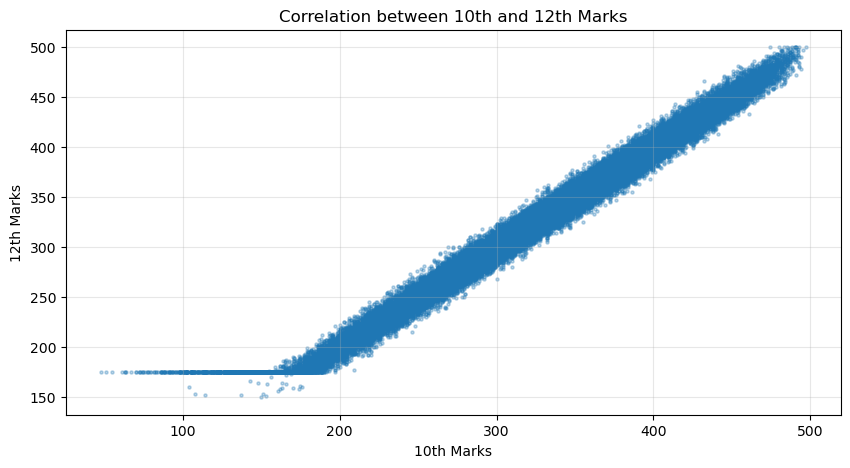

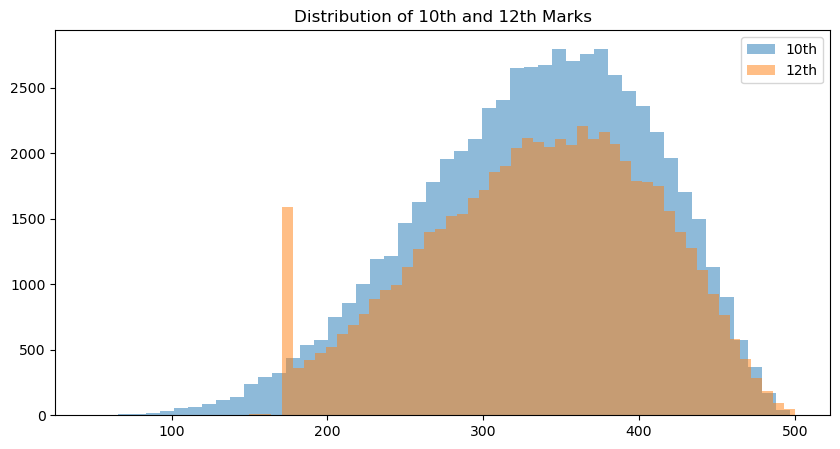

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- LOAD NAMES ----------
df_names = pd.read_csv(r"G:\My Drive\projects\data_science\working\dataset\IndianNamesUnique.csv")
available_numbers = list(range(0, df_names.shape[0]))

def get_unique_name(pool):
    num = random.choice(pool)
    pool.remove(num)
    return df_names.iloc[num]["Name"]

# ---------- PARAMETERS ----------
n = 60600
max_marks_10 = 500
max_marks_12 = 500
a10, b10 = 6, 3  # Beta params for 10th

correlation_strength = 0.8
noise_std = 8

# ---------- GENERATE 10TH MARKS ----------
marks10 = np.random.beta(a10, b10, size=n) * max_marks_10
marks10 = np.round(marks10).astype(int)

# ---------- GENERATE 12TH MARKS ----------
marks12 = []
for m10 in marks10:
    base_pct = (m10 / max_marks_10) * 100
    variation = np.random.normal(0, noise_std) * (1 - correlation_strength)
    m12_pct = base_pct + variation

    if m12_pct < 35 and np.random.rand() > 0.98:
        m12_pct = np.random.uniform(30, 35)
    else:
        m12_pct = max(35, min(100, m12_pct))

    m12 = round((m12_pct / 100) * max_marks_12)
    marks12.append(m12)

marks12 = np.array(marks12)

# ---------- ASSIGN UNIQUE NAMES ----------
names = [get_unique_name(available_numbers) for _ in range(n)]

# ---------- CREATE FINAL DATAFRAME ----------
df_final = pd.DataFrame({
    "student_id": np.arange(1, n + 1),
    "name": names,
    "marks_10th": marks10,
    "marks_12th": marks12
})

# ---------- SUMMARY ----------
print(df_final.head())
print(df_final.describe())

# ---------- VISUALIZATIONS ----------
plt.figure(figsize=(10,5))
plt.scatter(df_final["marks_10th"], df_final["marks_12th"], alpha=0.3, s=5)
plt.title("Correlation between 10th and 12th Marks")
plt.xlabel("10th Marks")
plt.ylabel("12th Marks")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_final["marks_10th"], bins=50, alpha=0.5, label="10th")
plt.hist(df_final["marks_12th"], bins=50, alpha=0.5, label="12th")
plt.legend()
plt.title("Distribution of 10th and 12th Marks")
plt.show()

# ---------- OPTIONAL SAVE ----------
# df_final.to_csv("synthetic_students_10th_12th.csv", index=False)
# print("CSV saved: synthetic_students_10th_12th.csv")


         student_id    marks_10th    marks_12th
count  60600.000000  60600.000000  60600.000000
mean   30300.500000    337.801287    337.796667
std    17493.857493     68.876308     69.304759
min        1.000000    175.000000    175.000000
25%    15150.750000    288.000000    288.000000
50%    30300.500000    342.000000    342.000000
75%    45450.250000    391.000000    391.000000
max    60600.000000    495.000000    500.000000


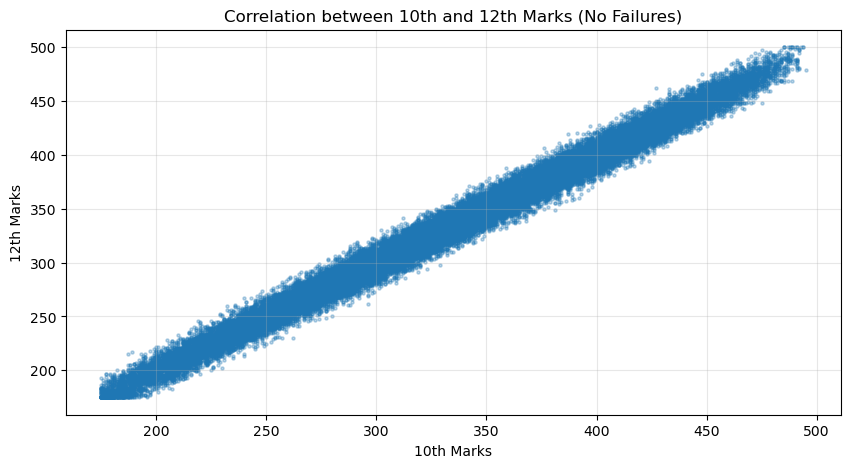

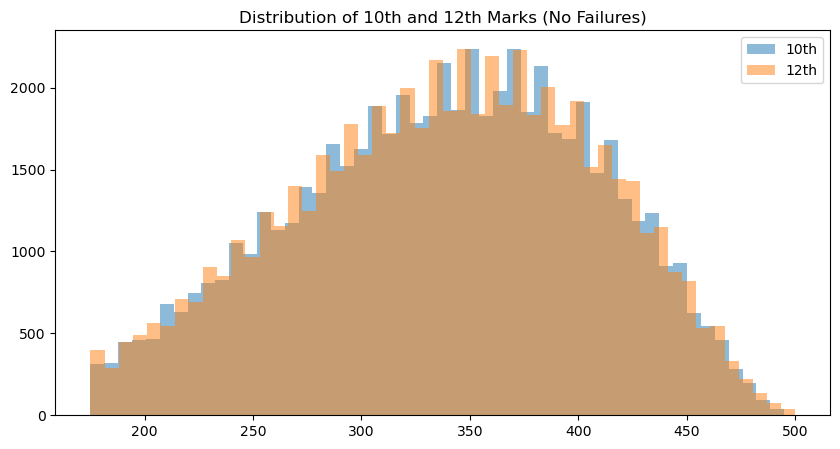

In [20]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- LOAD NAMES ----------
df_names = pd.read_csv(r"G:\My Drive\projects\data_science\working\dataset\IndianNamesUnique.csv")
available_numbers = list(range(0, df_names.shape[0]))

def get_unique_name(pool):
    num = random.choice(pool)
    pool.remove(num)
    return df_names.iloc[num]["Name"]

# ---------- PARAMETERS ----------
n = 60600
max_marks_10 = 500
max_marks_12 = 500
a10, b10 = 6, 3  # Beta params for 10th

correlation_strength = 0.8
noise_std = 8
pass_percentage = 35  # pass cutoff for 10th

# ---------- GENERATE MARKS WITH NO FAILURES ----------
marks10 = []
marks12 = []

while len(marks10) < n:
    # Generate a batch of 10th marks
    m10_batch = np.random.beta(a10, b10, size=n) * max_marks_10
    m10_batch = np.round(m10_batch).astype(int)

    for m10 in m10_batch:
        if len(marks10) >= n:
            break

        # Skip if below pass percentage in 10th
        if m10 < (pass_percentage / 100) * max_marks_10:
            continue

        # Generate 12th marks correlated to 10th
        base_pct = (m10 / max_marks_10) * 100
        variation = np.random.normal(0, noise_std) * (1 - correlation_strength)
        m12_pct = base_pct + variation

        # Clamp between pass% and 100%
        m12_pct = max(pass_percentage, min(100, m12_pct))

        m12 = round((m12_pct / 100) * max_marks_12)

        marks10.append(m10)
        marks12.append(m12)

marks10 = np.array(marks10)
marks12 = np.array(marks12)

# ---------- ASSIGN UNIQUE NAMES ----------
names = [get_unique_name(available_numbers) for _ in range(n)]

# ---------- CREATE FINAL DATAFRAME ----------
df_final = pd.DataFrame({
    "student_id": np.arange(1, n + 1),
    "name": names,
    "marks_10th": marks10,
    "marks_12th": marks12
})

# ---------- SUMMARY ----------
print(df_final.describe())

# ---------- VISUALIZATIONS ----------
plt.figure(figsize=(10,5))
plt.scatter(df_final["marks_10th"], df_final["marks_12th"], alpha=0.3, s=5)
plt.title("Correlation between 10th and 12th Marks (No Failures)")
plt.xlabel("10th Marks")
plt.ylabel("12th Marks")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10,5))
plt.hist(df_final["marks_10th"], bins=50, alpha=0.5, label="10th")
plt.hist(df_final["marks_12th"], bins=50, alpha=0.5, label="12th")
plt.legend()
plt.title("Distribution of 10th and 12th Marks (No Failures)")
plt.show()

# ---------- OPTIONAL SAVE ----------
# df_final.to_csv("synthetic_students_10th_12th_filtered.csv", index=False)
# print("CSV saved: synthetic_students_10th_12th_filtered.csv")
